In [1]:
using StateSpaceDynamics, Plots


In [2]:
model = initialize_slds()

SwitchingLinearDynamicalSystem([0.96 0.04; 0.04 0.96], StateSpaceDynamics.LinearDynamicalSystem[StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.9452539570141245 -0.09484174581448675; 0.09484174581448675 0.9452539570141245], [0.001 0.0; 0.0 0.001], [0.0, 0.0], [0.001 0.0; 0.0 0.001]), StateSpaceDynamics.GaussianObservationModel{Float64}([-0.31498797116895605 0.4338858743048611; -0.31125240132442067 -0.3954398407537453; … ; -0.8253345499750688 -0.9654904870197227; 0.840288523245819 0.9656607495563969], [0.001 0.0 … 0.0 0.0; 0.0 0.001 … 0.0 0.0; … ; 0.0 0.0 … 0.001 0.0; 0.0 0.0 … 0.0 0.001]), 2, 10, Bool[1, 1, 1, 1, 1, 1]), StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([-0.39533949471978524 -0.86383255548

In [3]:
model.B

2-element Vector{StateSpaceDynamics.LinearDynamicalSystem}:
 StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.9452539570141245 -0.09484174581448675; 0.09484174581448675 0.9452539570141245], [0.001 0.0; 0.0 0.001], [0.0, 0.0], [0.001 0.0; 0.0 0.001]), StateSpaceDynamics.GaussianObservationModel{Float64}([-0.31498797116895605 0.4338858743048611; -0.31125240132442067 -0.3954398407537453; … ; -0.8253345499750688 -0.9654904870197227; 0.840288523245819 0.9656607495563969], [0.001 0.0 … 0.0 0.0; 0.0 0.001 … 0.0 0.0; … ; 0.0 0.0 … 0.001 0.0; 0.0 0.0 … 0.0 0.001]), 2, 10, Bool[1, 1, 1, 1, 1, 1])
 StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([-0.39533949471978524 -0.8638325554843976; 0.8638325554843976 -0.395339

In [4]:
T = 1000
# Generate synthetic data
x, y, z = sample(model, T)


([-0.005774135480555194 0.0020675904922135436 … 0.032159415587346474 0.05372887375999916; -0.017762773388346566 0.054760456040334735 … -0.10696223889695364 -0.09699464732560406], [-0.008165093772717243 0.045631950197704704 … -0.050323491624458885 -0.014473504581514515; 0.01744928312424765 -0.02060159033120583 … 0.0675583423786563 0.00388597355675159; … ; 0.005329651249859693 0.1451787980075594 … 0.03213684839745746 -0.03051328424403746; -0.029226275954721277 -0.024055213658275062 … -0.08508079724902803 -0.016188887912414893], [2, 2, 2, 2, 2, 2, 2, 2, 2, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

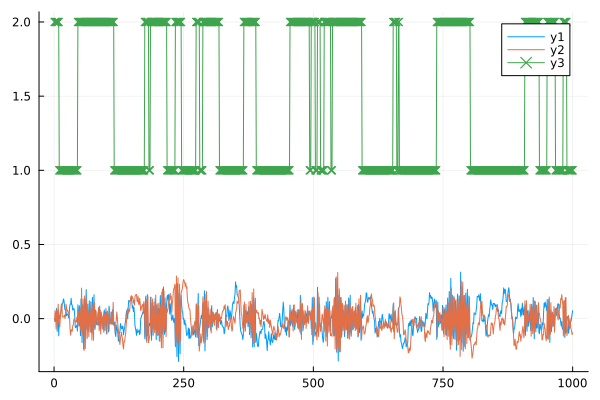

In [5]:
plot(x')
plot!(z, marker=:x)

In [6]:
using LinearAlgebra

p = model.B[1].obs_dim
d = model.B[1].latent_dim

K = model.K
A = [0.7 0.3; 0.2 0.8]
A ./= sum(A, dims=2) # Normalize rows to sum to 1

πₖ = rand(K)
πₖ ./= sum(πₖ) # Normalize to sum to 1

Q = Matrix(0.5 * I(d))

x0 = [0.0; 0.0]
P0 = Matrix(0.5 * I(d))

# set up the observation parameters
C = randn(p, d)
R = Matrix(0.001 * I(p))

B = [StateSpaceDynamics.LinearDynamicalSystem(
    StateSpaceDynamics.GaussianStateModel(0.95 * [cos(f) -sin(f); sin(f) cos(f)], Q, x0, P0),
    StateSpaceDynamics.GaussianObservationModel(C, R),
    d, p, fill(true, 6  )) for (i,f) in zip(1:K, [0.5, 0.5])]

modeli = SwitchingLinearDynamicalSystem(A, B, πₖ, model.K)

SwitchingLinearDynamicalSystem([0.9 0.1; 0.2 0.8], StateSpaceDynamics.LinearDynamicalSystem[StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.8337034337958541 -0.45545426167399283; 0.45545426167399283 0.8337034337958541], [0.5 0.0; 0.0 0.5], [0.0, 0.0], [0.5 0.0; 0.0 0.5]), StateSpaceDynamics.GaussianObservationModel{Float64}([1.0548426197090242 -0.5314211023224301; -0.6474332415107721 0.1271760215776717; … ; -0.6187600545042322 0.04491788725458301; 0.75661587672164 0.16538516227614086], [0.001 0.0 … 0.0 0.0; 0.0 0.001 … 0.0 0.0; … ; 0.0 0.0 … 0.001 0.0; 0.0 0.0 … 0.0 0.001]), 2, 10, Bool[1, 1, 1, 1, 1, 1]), StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.8337034337958541 -0.45545426167399283; 0.4554542

In [7]:
FB = StateSpaceDynamics.initialize_forward_backward(modeli, T)
FS = [StateSpaceDynamics.initialize_FilterSmooth(modeli.B[k], T) for k in 1:K]

ml = zeros(10,1)
for i in 1:length(ml)
    ml[i] = variational_expectation!(modeli, y, FB, FS)  
end

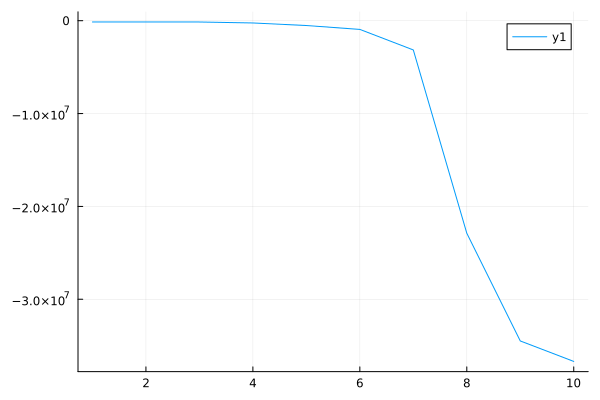

In [8]:
plot(ml)

In [9]:
mls, param_diff, FB, FS = fit!(modeli, y; max_iter=50)

Fitting SLDS via vEM... 100%|██████████████████████████████████████████████████| Time: 0:00:10 ( 0.20  s/it)


([-139207.4279624179, -87914.62659816876, -101737.81288233722, -108970.07942347779, -109774.94746756431, -109991.27346637686, -111222.0993323962, -114004.96453824555, -120472.57624660766, -124598.03105076536  …  -124737.89687824069, -124737.59906387271, -124737.37018824741, -124737.19016860239, -124737.04544481327, -124736.92665182851, -124736.8271872244, -124736.74231178495, -124736.66857161757, -124736.6034177342], [10.264358424517722, 6.264358594696073, 2.6741412132891944, 0.5399338097695972, 0.35693580743851067, 0.27503657371159035, 0.22753926681149841, 0.7151631140091951, 1.5806339045337718, 1.4245403380741084  …  2.4206052049764382e-5, 2.5025157982064366e-5, 2.5574741569111954e-5, 2.590745140450935e-5, 2.607568314459723e-5, 2.6122669002283203e-5, 2.608187615261734e-5, 2.5978530014117174e-5, 2.583140702947726e-5, 2.5654390382186245e-5], StateSpaceDynamics.ForwardBackward{Float64}([-3.029595004322186 -34.35277379776102 … 0.0 0.0; -0.049542417240135535 -1.3322676295501888e-15 … -104

In [12]:
model.A

2×2 Matrix{Float64}:
 0.96  0.04
 0.04  0.96

In [13]:
modeli.A

2×2 Matrix{Float64}:
 0.964222   0.0357782
 0.0477273  0.952273

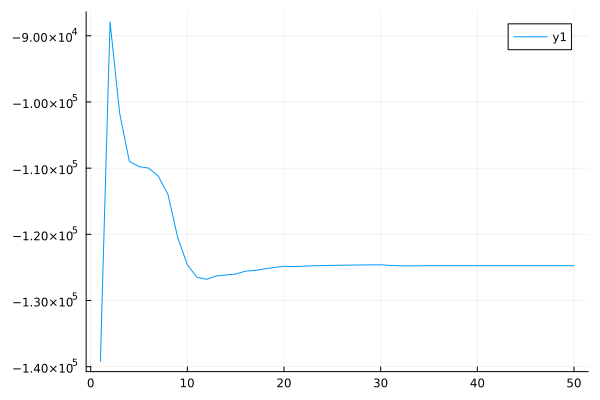

In [10]:
plot(mls)

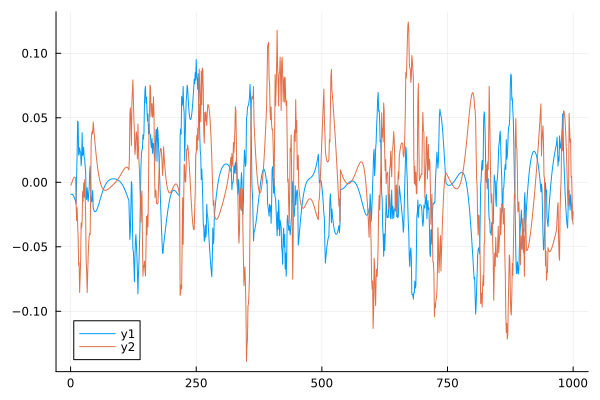

In [14]:
plot(FS[1].x_smooth')

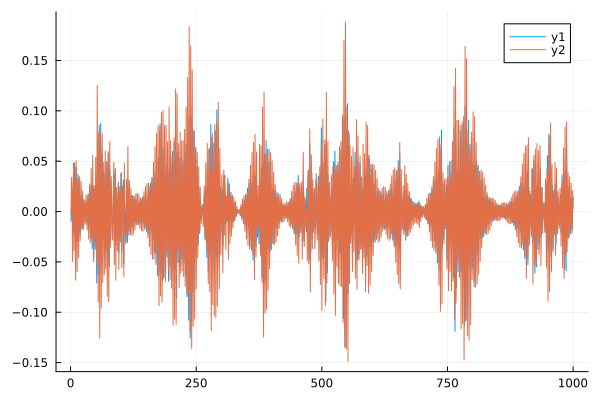

In [15]:
plot(FS[2].x_smooth')

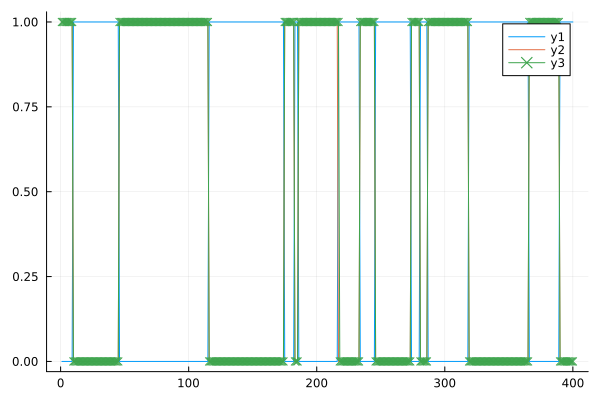

In [16]:
plot(exp.(FB.γ[:,1:400])')
plot!(z[1:400] .- 1, marker=:x)

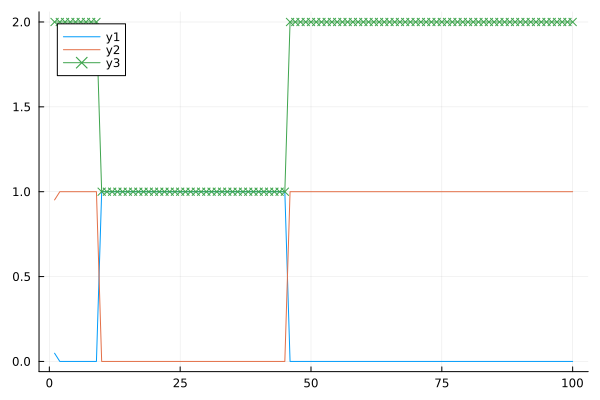

In [17]:
plot(exp.(FB.loglikelihoods[:,1:100])')
plot!(z[1:100], marker=:x)

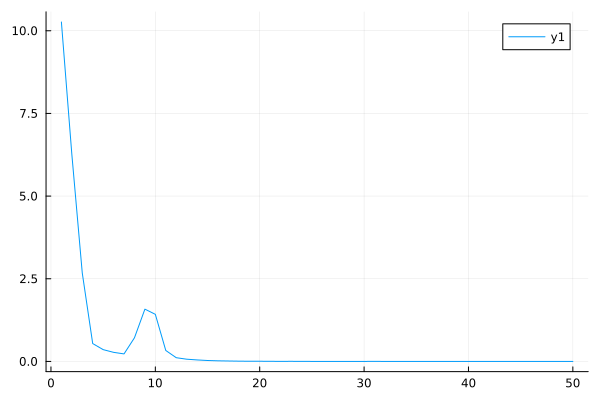

In [18]:
plot(param_diff)